In [355]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as statsModelApi
from sklearn.metrics import r2_score

In [363]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


2.0.3
1.24.3
0.12.2


In [274]:
# Import the data into CSV , renamed the df as bikesharing_df
bikesharing_df = pd.read_csv('day.csv')

In [275]:
# show first 10 lines 
bikesharing_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [276]:
# getting to know the rows vs columns for the dataframe 
# turns out to be 730 rows and 16 columns
bikesharing_df.shape

(730, 16)

In [277]:
# describing the dataset just for our knowledge and calculating the basic values 
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [278]:
# checking for info on datatypes of the dataframe
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [279]:
# cleaning the data and replacing the values of yr into something more meaningful as to 2018 and 2019
#bikesharing_df['yr'] = bikesharing_df['yr'].replace(0,2018)
#bikesharing_df['yr'] = bikesharing_df['yr'].replace(1,2019)

#bikesharing_df


In [280]:
# checking for duplicate and null values 
bikesharing_df.rename(columns = {'hum' : 'humidity','cnt': 'TotalCount'},inplace=True)
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,TotalCount
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [281]:
# checking the columns 
bikesharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'TotalCount'],
      dtype='object')

In [282]:
# dropping unnecessary columns 
bikesharing_df.drop('instant', axis=1,inplace=True)

In [283]:
bikesharing_df.drop('dteday', axis=1,inplace=True)

In [288]:
bikesharing_df.drop('atemp', axis=1,inplace=True)

KeyError: "['atemp'] not found in axis"

In [ ]:
bikesharing_df.drop('casual', axis=1,inplace=True)

In [ ]:
bikesharing_df.drop('registered', axis=1,inplace=True)

In [ ]:
bikesharing_df.shape

In [289]:
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'TotalCount'],
      dtype='object')

In [290]:
# Standardizing values in the dataframe for various values as they are in a slightly confusing form

# Season
bikesharing_df["season"] = bikesharing_df["season"].replace([1, 2, 3, 4], ["spring", "summer", "fall", "winter"])

# Month 
bikesharing_df["mnth"] = bikesharing_df["mnth"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                                          ["Jan", "Feb", "Mar", "Apr", "May", "June","July","Aug","Sep","Oct","Nov","Dec"])

# WeatherSit
bikesharing_df["weathersit"] = bikesharing_df["weathersit"].replace([1, 2, 3], 
                                                          ["ClearWeather", "Misty", "LightSnoworRain"])


# Weekday - Weekdays were in jumbled form when we checked the dataset manuallly and sort out the days
bikesharing_df["weekday"] = bikesharing_df["weekday"].replace([5,6,0,1,2,3,4], 
                                                          ["Sunday", "Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday"])

bikesharing_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,TotalCount
0,spring,0,Jan,0,Monday,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,ClearWeather,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,ClearWeather,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,ClearWeather,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Saturday,1,Misty,10.420847,65.2917,23.458911,2114
726,spring,1,Dec,0,Sunday,1,Misty,10.386653,59.0000,10.416557,3095
727,spring,1,Dec,0,Monday,0,Misty,10.386653,75.2917,8.333661,1341
728,spring,1,Dec,0,Tuesday,0,ClearWeather,10.489153,48.3333,23.500518,1796


## Visualization


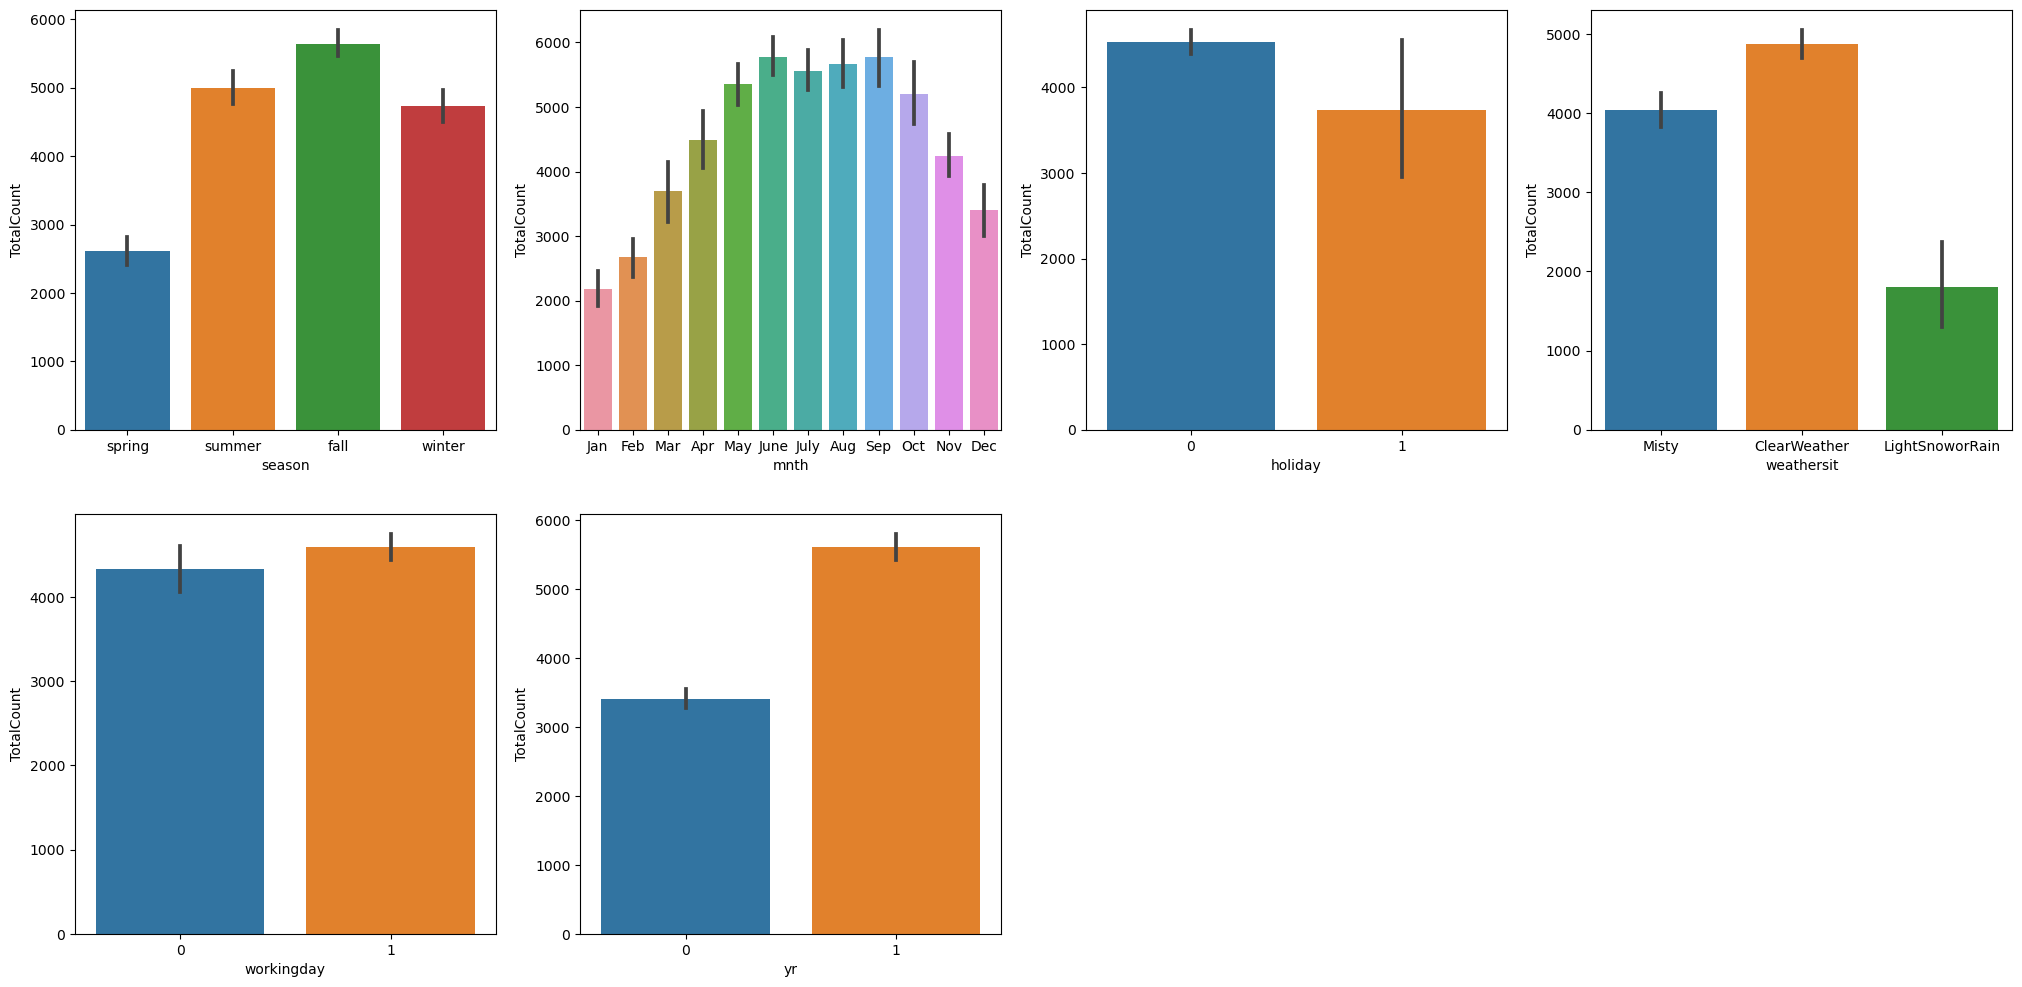

In [291]:
# Here the target variable is Cnt or in short TotalCount where we changed the name above and all the other 
# variables are predictor variables.

# Hence visualizing these predictor variables against target variable. 
plt.figure(figsize=(25, 12))

# It seems max number of bikes were rented in fall season
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'TotalCount', data = bikesharing_df)

# It seems from the below plot that max bikes were hired in the month of June 
plt.subplot(2,4,2)
sns.barplot(x = 'mnth', y = 'TotalCount', data = bikesharing_df)

# It seems from the below plot that on non-holidays people were hiring bikes more for commuting 
# to their office
plt.subplot(2,4,3)
sns.barplot(x = 'holiday', y = 'TotalCount', data = bikesharing_df)

# Throught the plot below we can see that the people hire bikes more when there is clear weather. 
plt.subplot(2,4,4)
sns.barplot(x = 'weathersit', y = 'TotalCount', data = bikesharing_df) # Done

# The plot shows that the count of bikes hired is sligthly higher on working days rather than holidays.
plt.subplot(2,4,5)
sns.barplot(x = 'workingday', y = 'TotalCount', data = bikesharing_df)

# The plot shows that the bikes hired was way higher in 2019 rather than in 2018.
plt.subplot(2,4,6)
sns.barplot(x = 'yr', y = 'TotalCount', data = bikesharing_df)
plt.show()

In [292]:
# Creating a method to now plot the graph against different columns by keeping the main TotalCount column and hue as yr (year) to 
# analyse different trends over the years. 

def categorical_columncomp(column):
    plt.figure(figsize = (10,5))
    sns.barplot(x=column,y='TotalCount',hue='yr',data=bikesharing_df)#, ,palette='Pastel')
    plt.legend(labels=['2018', '2019'])
    plt.show()

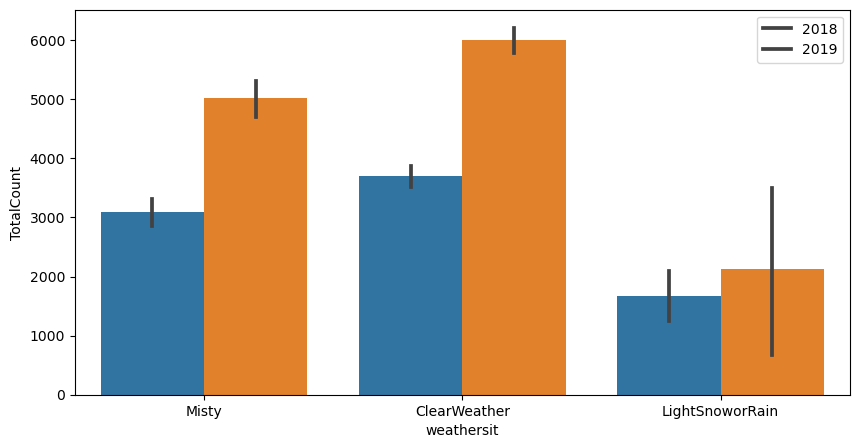

In [293]:
categorical_columncomp('weathersit')

## 
Inference :- The above plot shows that the highest demand of registered bikes is when the weather is clear. 

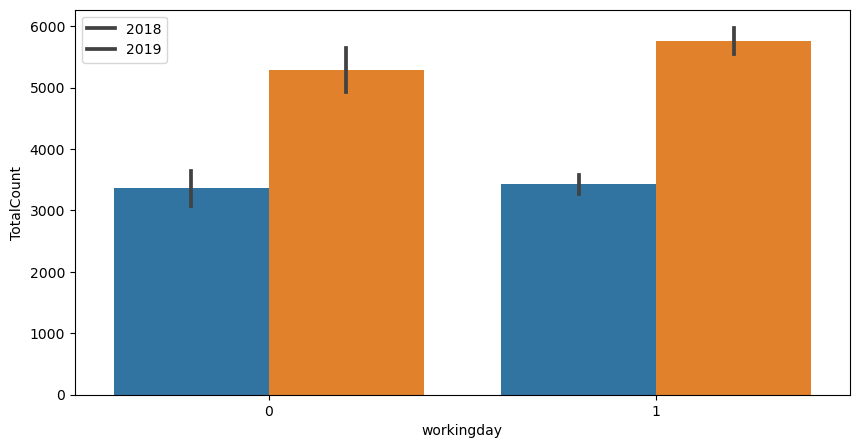

In [294]:
categorical_columncomp('workingday')

## 
Inference :- By the above plotting we can deduce that the there is a rise in the rentals over working days. It shows people are using rentals over working days more than on holidays.  

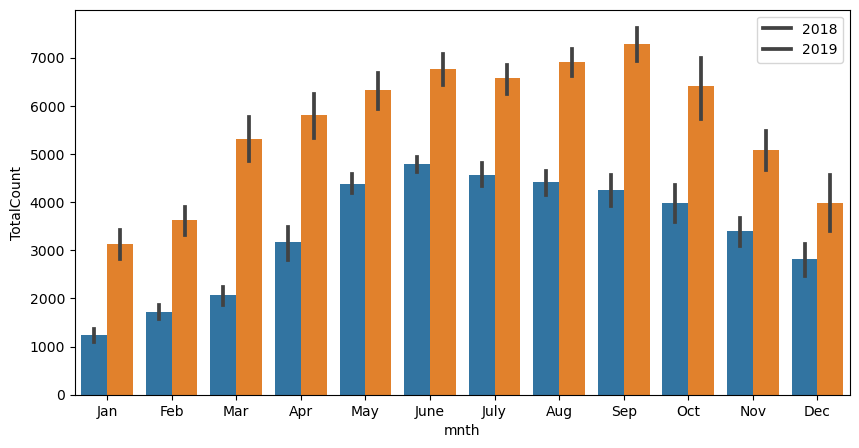

In [295]:
categorical_columncomp('mnth')

## 
Inference :- We can see that the highest number of rentals peak in the months of Jun - Sep. Also the num of booking show a spike increase from 2018 to 2019. 

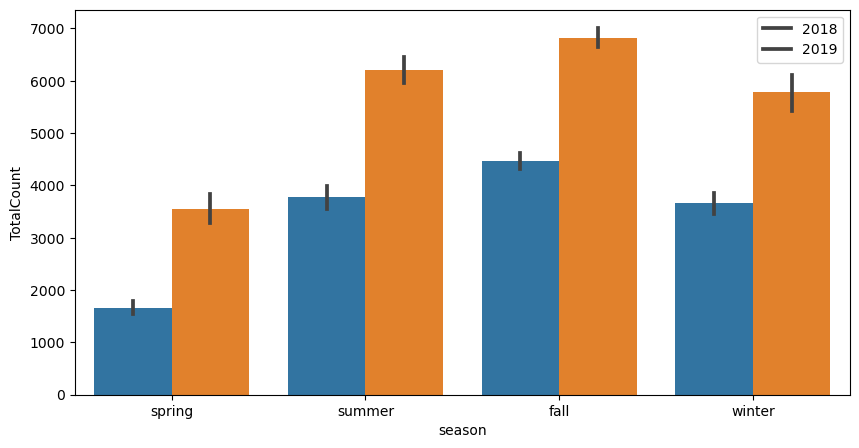

In [296]:
categorical_columncomp('season')

## 
Inference :- We could see the spike increase from 2018 to 2019 and in 2018 also there was a sharp increase in the rentals in the fall season. So people prefer to ride bikes/rentals when the season is summer or fall. 

## Now plotting the correlations between various numerical variables. 

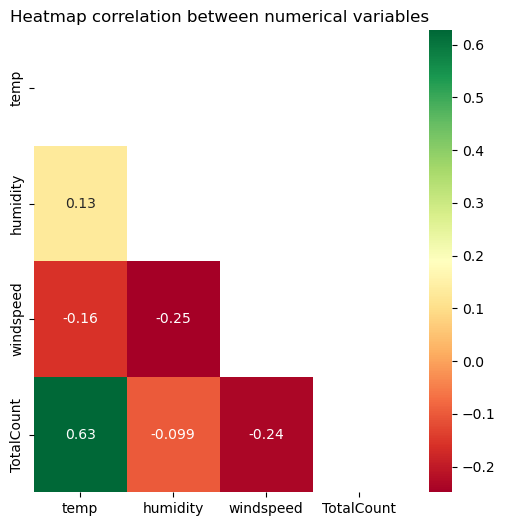

In [297]:
plt.figure(figsize = (6,6))
matrix = np.triu(bikesharing_df[['temp','humidity','windspeed','TotalCount']].corr())
sns.heatmap(bikesharing_df[['temp','humidity','windspeed','TotalCount']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Heatmap correlation between numerical variables")
plt.show()

## 
The above plot signifies the correlation between different numerical variables. It basically plots different numerical values and their 
relations with each other.

## Plotting dummy values to sanitise and prepare data for upcoming linear and multiple regression analysis

In [298]:
# Dummy values creation for sanitizing data and prepare data for regression analysis

mnth_df       = pd.get_dummies(bikesharing_df.mnth,drop_first=True)
season_df     = pd.get_dummies(bikesharing_df.season,drop_first=True)
wkdays_df     = pd.get_dummies(bikesharing_df.weekday,drop_first=True)
weather_df    = pd.get_dummies(bikesharing_df.weathersit,drop_first=True)

In [299]:
# dropping the columns after dummy creations. 

column_list = ["mnth","weathersit","season","weekday"]
bikesharing_df.drop(column_list, axis=1,inplace=True)

In [300]:
bikesharing_df.head()

,yr,holiday,workingday,temp,humidity,windspeed,TotalCount
0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [301]:
bikesharing_df_new = pd.concat([bikesharing_df,mnth_df,wkdays_df,weather_df,season_df],axis=1)

In [302]:
bikesharing_df_new.head()

,yr,holiday,workingday,temp,humidity,windspeed,TotalCount,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnoworRain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,True,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [303]:
bikesharing_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   humidity         730 non-null    float64
 5   windspeed        730 non-null    float64
 6   TotalCount       730 non-null    int64  
 7   Aug              730 non-null    bool   
 8   Dec              730 non-null    bool   
 9   Feb              730 non-null    bool   
 10  Jan              730 non-null    bool   
 11  July             730 non-null    bool   
 12  June             730 non-null    bool   
 13  Mar              730 non-null    bool   
 14  May              730 non-null    bool   
 15  Nov              730 non-null    bool   
 16  Oct              730 non-null    bool   
 17  Sep             

## Training and testing sets 

In [304]:
# Splitting the data set into train and test data sets and then analysing 
# Utilizing the datasets as 70% train and 30% test sets 

bikesharing_df_train, bikesharing_df_test = train_test_split(bikesharing_df_new, train_size = 0.7, random_state = 100)

In [305]:
# Finding the shape of two datasets separately training and test datasets 
bikesharing_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   humidity         510 non-null    float64
 5   windspeed        510 non-null    float64
 6   TotalCount       510 non-null    int64  
 7   Aug              510 non-null    bool   
 8   Dec              510 non-null    bool   
 9   Feb              510 non-null    bool   
 10  Jan              510 non-null    bool   
 11  July             510 non-null    bool   
 12  June             510 non-null    bool   
 13  Mar              510 non-null    bool   
 14  May              510 non-null    bool   
 15  Nov              510 non-null    bool   
 16  Oct              510 non-null    bool   
 17  Sep              51

In [306]:
# Replacing the values from string to values accepted by the RFE analysis

bikesharing_df_train.replace(["Jan", "Feb", "Mar", "Apr", "May", "June","July","Aug","Sep","Oct","Nov","Dec"],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],inplace=True)

In [307]:
bikesharing_df_train.replace(["ClearWeather", "Misty", "LightSnoworRain"],[1, 2, 3],inplace=True)

In [308]:
bikesharing_df_train.replace(["Sunday", "Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday"],[5,6,0,1,2,3,4],inplace=True)                                                          

In [309]:
bikesharing_df_train.replace(["spring", "summer", "fall", "winter"],[1, 2, 3, 4],inplace=True)

In [310]:
# Changing the type of the int64 column to float 64 column for further use below.
#column_list = ["mnth","weathersit","season","weekday"]

#bikesharing_df_train[column_list] = bikesharing_df_train[column_list].apply(pd.to_numeric, errors='coerce')

In [311]:
bikesharing_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   humidity         510 non-null    float64
 5   windspeed        510 non-null    float64
 6   TotalCount       510 non-null    int64  
 7   Aug              510 non-null    bool   
 8   Dec              510 non-null    bool   
 9   Feb              510 non-null    bool   
 10  Jan              510 non-null    bool   
 11  July             510 non-null    bool   
 12  June             510 non-null    bool   
 13  Mar              510 non-null    bool   
 14  May              510 non-null    bool   
 15  Nov              510 non-null    bool   
 16  Oct              510 non-null    bool   
 17  Sep              51

In [312]:
bikesharing_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               220 non-null    int64  
 1   holiday          220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   humidity         220 non-null    float64
 5   windspeed        220 non-null    float64
 6   TotalCount       220 non-null    int64  
 7   Aug              220 non-null    bool   
 8   Dec              220 non-null    bool   
 9   Feb              220 non-null    bool   
 10  Jan              220 non-null    bool   
 11  July             220 non-null    bool   
 12  June             220 non-null    bool   
 13  Mar              220 non-null    bool   
 14  May              220 non-null    bool   
 15  Nov              220 non-null    bool   
 16  Oct              220 non-null    bool   
 17  Sep              22

## Applying Scaling technique

In [313]:
# Initializing minmax scaler
bikesharingScaler = MinMaxScaler()

In [314]:
# Applying scaler to numerical variables 
NumericVars = ['temp','humidity','windspeed','TotalCount']
bikesharing_df_train[NumericVars] = bikesharingScaler.fit_transform(bikesharing_df_train[NumericVars])

bikesharing_df_train.head()

,yr,holiday,workingday,temp,humidity,windspeed,TotalCount,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnoworRain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,True,False,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,False,False,False,...,False,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,False,True,False,...,False,False,False,True,False,False,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,False,False,...,False,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.751824,0.380981,0.191095,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [315]:
# Now plotting a linear model finally 
# Building the Linear Model

y_train = bikesharing_df_train.pop('TotalCount')
x_train = bikesharing_df_train

In [316]:
# Recursive feature elimination 

linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

recurFeatureElimination = RFE(linearModel,n_features_to_select=15)
recurFeatureElimination = recurFeatureElimination.fit(x_train, y_train)

In [317]:
list(zip(x_train.columns,recurFeatureElimination.support_,recurFeatureElimination.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 11),
 ('Feb', False, 14),
 ('Jan', True, 1),
 ('July', False, 9),
 ('June', False, 6),
 ('Mar', False, 5),
 ('May', False, 4),
 ('Nov', False, 10),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', False, 12),
 ('Thursday', False, 8),
 ('Tuesday', True, 1),
 ('Wednesday', False, 7),
 ('LightSnoworRain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 3),
 ('summer', True, 1),
 ('winter', True, 1)]

In [318]:
# Making a column list of all the selected variables
selectedCol = x_train.columns[recurFeatureElimination.support_]

selectedCol

Index(['yr', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Aug',
       'Jan', 'Sep', 'Monday', 'Tuesday', 'LightSnoworRain', 'Misty', 'summer',
       'winter'],
      dtype='object')

In [319]:
# Making a function to calculate the VIF of the training and test data sets


def calculateVariation(bikesharing_df):
    vif = pd.DataFrame()
    vif['Features'] = bikesharing_df.columns
    vif['VIF'] = [variance_inflation_factor(bikesharing_df.values.astype(float), i) for i in range(bikesharing_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [320]:
x_train_recurFeatureElimination = x_train[selectedCol]
print(x_train_recurFeatureElimination)

     yr  holiday  workingday      temp  humidity  windspeed    Aug    Jan  \
576   1        0           1  0.815169  0.725633   0.264686  False  False   
426   1        0           0  0.442393  0.640189   0.255342  False  False   
728   1        0           0  0.245101  0.498067   0.663106  False  False   
482   1        0           0  0.395666  0.504508   0.188475  False  False   
111   0        0           1  0.345824  0.751824   0.380981  False  False   
..   ..      ...         ...       ...       ...        ...    ...    ...   
578   1        0           1  0.863973  0.679690   0.187140   True  False   
53    0        0           1  0.202618  0.435939   0.111379  False  False   
350   0        0           0  0.248216  0.577930   0.431816  False  False   
79    0        0           1  0.462664  0.759870   0.529881  False  False   
520   1        0           1  0.600225  0.632030   0.359599  False  False   

       Sep  Monday  Tuesday  LightSnoworRain  Misty  summer  winter  
576  

In [321]:
# Now calculating the VIF for the latest recurFeatureElimination
calculateVariation(x_train_recurFeatureElimination)

,Features,VIF
2,workingday,34.00
9,Monday,8.38
10,Tuesday,8.20
1,holiday,2.24
3,temp,1.94
4,humidity,1.88
14,winter,1.58
12,Misty,1.56
7,Jan,1.55
13,summer,1.48


In [322]:
# We can see Humidity has high VIF value hence its a good idea to drop it and make another LR model. 

# As humidity shows high VIF values hence we can drop it
X_train_refreshed = x_train_recurFeatureElimination.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVariation(X_train_refreshed)

,Features,VIF
2,workingday,15.91
8,Monday,4.41
9,Tuesday,4.10
3,temp,1.85
1,holiday,1.54
6,Jan,1.54
13,winter,1.51
12,summer,1.47
5,Aug,1.45
7,Sep,1.21


#
We can see that humidity show higher VIF value so we have removed that and then plotted our first linear regression model. 

## Finally starting building the linear model

In [323]:
# Adding the constant for the linear regression model and following the OLS approach.

x_train_linearmodel_1 = statsModelApi.add_constant(X_train_refreshed.astype(float))
linearRegression_1 = statsModelApi.OLS(y_train,x_train_linearmodel_1).fit()
print(linearRegression_1.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalCount   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          6.55e-189
Time:                        07:26:18   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1017      0.016     

In [324]:
# Here we can see that the Tuesday column has the highest p-value. Hence we can drop that. 
X_train_refreshed = X_train_refreshed.drop(['Tuesday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVariation(X_train_refreshed)


,Features,VIF
3,temp,6.47
2,workingday,4.69
4,windspeed,3.69
0,yr,2.05
11,summer,1.91
8,Monday,1.84
12,winter,1.62
5,Aug,1.60
10,Misty,1.57
6,Jan,1.32


In [325]:
# Now plotting another regression model. 

x_train_linearmodel_2 = statsModelApi.add_constant(X_train_refreshed.astype(float))
linearRegression_2 = statsModelApi.OLS(y_train,x_train_linearmodel_2).fit()
print(linearRegression_2.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalCount   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          6.55e-189
Time:                        07:27:20   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1149      0.021     

In [326]:
# Dropping Jan column in this case as it has high p-value

X_train_refreshed = X_train_refreshed.drop(['Jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVariation(X_train_refreshed)

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
10,summer,1.82
7,Monday,1.76
5,Aug,1.58
9,Misty,1.54
11,winter,1.52
6,Sep,1.31


In [327]:
# plotting another Regression model 3 now
x_train_linearmodel_3 = statsModelApi.add_constant(X_train_refreshed.astype(float))
linearRegression_3 = statsModelApi.OLS(y_train,x_train_linearmodel_3).fit()

print(linearRegression_3.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalCount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          8.64e-189
Time:                        07:27:44   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0903      0.019     

In [328]:
linearRegression_3.params

const              0.090297
yr                 0.232711
holiday           -0.056011
workingday         0.046317
temp               0.518828
windspeed         -0.150835
Aug                0.050952
Sep                0.113626
Monday             0.056927
LightSnoworRain   -0.287225
Misty             -0.083049
summer             0.100362
winter             0.138202
dtype: float64

## Error terms plotting

In [329]:
y_train_Predicted = linearRegression_3.predict(x_train_linearmodel_3)

Text(0.5, 0, 'Errors')

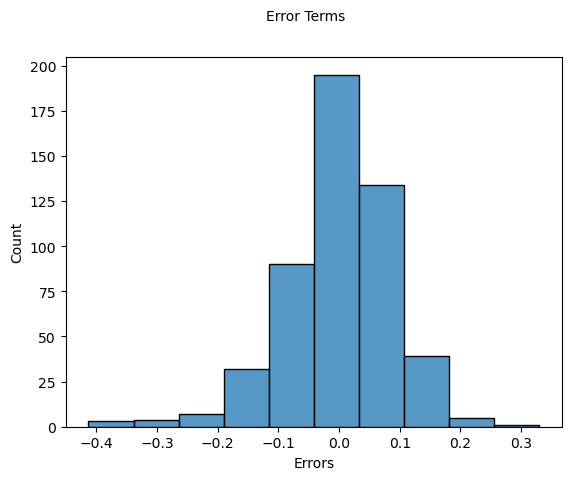

In [330]:
# plotting the errors

fig = plt.figure()
sns.histplot((y_train - y_train_Predicted), bins = 10)
fig.suptitle('Error Terms', fontsize = 10) 
plt.xlabel('Errors', fontsize = 10)

# 
Hence inferred from the above graph that the error terms are evenly distributed.

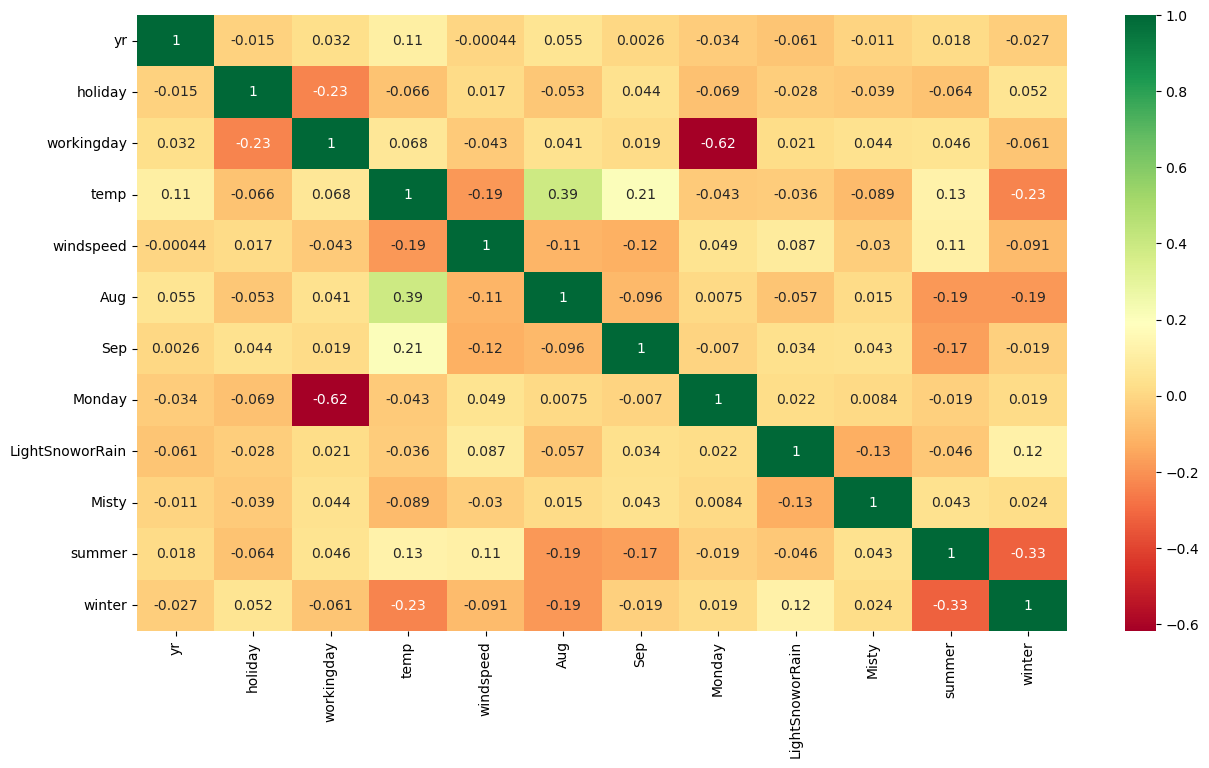

In [348]:
# Now we have to check the multi-collinearity between the different variables now. 

plt.figure(figsize=(15,8))
sns.heatmap(X_train_refreshed.corr(),annot = True, cmap="RdYlGn")
plt.show()

# 
As we could see from the heatmap above that there exists very minimal to 0 collinearity amongst different variables. 

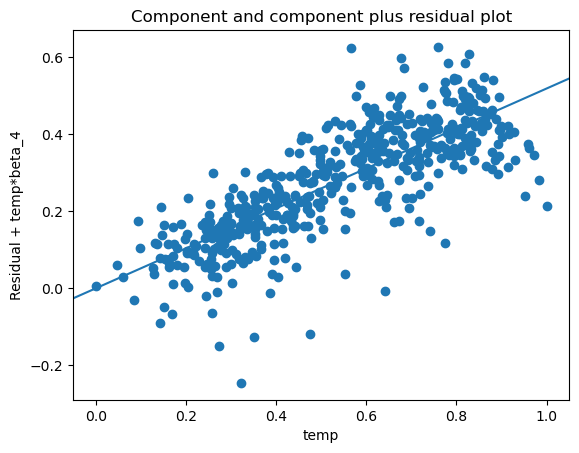

In [351]:
# plotting and checking the linearity of the most dominant variable temp via a CCPR plot

statsModelApi.graphics.plot_ccpr(linearRegression_3, 'temp')
plt.show()

## Now finally building the model and making predictions

In [331]:
# applying scaling and cleaning up data with the test set now

NumericVars = ['temp','humidity','windspeed','TotalCount']
bikesharing_df_test[NumericVars] = bikesharingScaler.transform(bikesharing_df_test[NumericVars])
bikesharing_df_test.head()

,yr,holiday,workingday,temp,humidity,windspeed,TotalCount,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnoworRain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,False,False,False,...,False,False,False,False,True,False,True,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,0.712034,False,False,False,...,False,False,False,False,False,False,False,False,True,False
299,0,0,1,0.511964,0.837699,0.334206,0.303382,False,False,False,...,True,False,False,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.437098,0.339570,0.547400,True,False,False,...,False,False,False,False,False,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,0.569029,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [332]:
bikesharing_df_test.replace(["Jan", "Feb", "Mar", "Apr", "May", "June","July","Aug","Sep","Oct","Nov","Dec"],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],inplace=True)

In [333]:
bikesharing_df_test.replace(["ClearWeather", "Misty", "LightSnoworRain"],[1, 2, 3],inplace=True)

In [335]:
bikesharing_df_test.replace(["Sunday", "Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday"],[5,6,0,1,2,3,4],inplace=True)                                                          

In [336]:
bikesharing_df_test.replace(["spring", "summer", "fall", "winter"],[1, 2, 3, 4],inplace=True)

In [337]:
bikesharing_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               220 non-null    int64  
 1   holiday          220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   humidity         220 non-null    float64
 5   windspeed        220 non-null    float64
 6   TotalCount       220 non-null    float64
 7   Aug              220 non-null    bool   
 8   Dec              220 non-null    bool   
 9   Feb              220 non-null    bool   
 10  Jan              220 non-null    bool   
 11  July             220 non-null    bool   
 12  June             220 non-null    bool   
 13  Mar              220 non-null    bool   
 14  May              220 non-null    bool   
 15  Nov              220 non-null    bool   
 16  Oct              220 non-null    bool   
 17  Sep              22

In [338]:
bikesharing_df_test.describe()

,yr,holiday,workingday,temp,humidity,windspeed,TotalCount
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [339]:
y_test = bikesharing_df_test.pop('TotalCount')
x_test = bikesharing_df_test

In [340]:
X_train_refreshed.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Aug', 'Sep',
       'Monday', 'LightSnoworRain', 'Misty', 'summer', 'winter'],
      dtype='object')

In [341]:
selectedColTest = X_train_refreshed.columns
x_test = x_test[selectedColTest]

x_test_LinearModel = statsModelApi.add_constant(x_test)

In [342]:
y_train_Predicted = linearRegression_3.predict(x_test_LinearModel)

In [343]:
r2 = r2_score(y_test, y_train_Predicted)
round(r2,4)

0.7975

## Final plotting of actual vs predicted values 

In [344]:
linearRegression_3.params

const              0.090297
yr                 0.232711
holiday           -0.056011
workingday         0.046317
temp               0.518828
windspeed         -0.150835
Aug                0.050952
Sep                0.113626
Monday             0.056927
LightSnoworRain   -0.287225
Misty             -0.083049
summer             0.100362
winter             0.138202
dtype: float64

In [345]:
# Now calculating the adjusted R2 for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7857


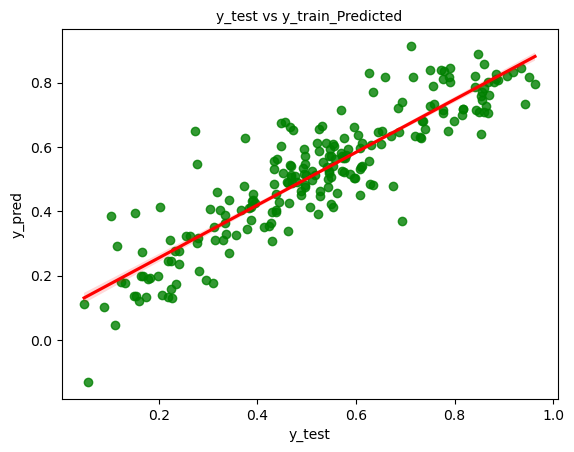

In [346]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test.astype(float), y=y_train_Predicted.astype(float), ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_train_Predicted', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()

In [217]:
# Here in we can see a scattered pattern but running along the line for the best fit. 

## Critical values 

# 
R2 score for Train data set - 0.840
# 
R2 score for Test data set - 0.7975
# 
Adjusted R2 score for Train data set -  0.836
# 
Adjusted R2 score for Test data set - 0.7857